# CS 4662 Final Project

Dog Emotion Detection

Group: Jonah Kim, Kenneth Lieu, Minsu Lee, Peter Han, Thomas Benson

Technique: SVM

In [1]:
####################
# IMPORT LIBRARIES #
####################
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC

%matplotlib inline

In [2]:
#####################################
# Load label data from google drive #
#####################################
URL = "https://drive.google.com/file/d/190lgHT5mbV0kSvxJQi3G8AHzHuuhNzl4/view?usp=share_link"
PATH = "https://drive.google.com/uc?export=download&id="+URL.split('/')[-2]
labels = pd.read_csv(PATH)

#Sort the labels 
sorted_labels = labels.sort_values(by="filename")
sorted_labels.head(20)

,Unnamed: 0,filename,label
543,543,001ndHD2FL3RHNrUp29Qp4WvTiHo5K388.jpg,sad
2695,2695,02moEqkRoDqAbzoLSBOuzFd3iVK53n423.jpg,relaxed
824,824,02rDGGot7kGU3cKIB5qhOfPaetpRNq548.jpg,sad
929,929,04FMq3exmYnLxQ85XzYhS0a9Mrb5Ic420.jpg,happy
607,607,04SQoOw0cFD5lsACrLRCmUWFPu16AU746.jpg,sad
382,382,04f9aAUe5glmLufixJGSc9Yv1X2mRU123.jpg,relaxed
1369,1369,05fRy39hx2kiC09SbErKww536WBPym179.jpg,happy
3855,3855,08mrG3hgF3M4bmy65ZJZBmYulhJ1es699.jpg,happy
2017,2017,09dUVMcjCDfOtbeYDQg5Fvu3GPHWJg811.jpg,angry
2399,2399,09qhORmLRHfy6HgNlXTDlqJVk1NJod130.jpg,sad


In [3]:
##############################################
# Determine average dimensions of the images #
##############################################
#base_path = "/content/drive/MyDrive/"
#folder = "dogs"
import os
path = os.path.join(r".\archive\Dog Emotion\Dogs")
widths = []
heights = []

for file in os.listdir(path):
    img_path = os.path.join(path, file)
    img = cv2.imread(img_path)
    height, width, _ = img.shape

    widths.append(width)
    heights.append(height)

avg_width = sum(widths) / len(widths)
avg_height = sum(heights) / len(heights)

print(f"Average width: {avg_width}")
print(f"Average height: {avg_height}")

# use these values to resize images uniformly

Average width: 417.8225
Average height: 388.9135


In [4]:
#####################################
# Load image data from google drive #
#####################################
images = []

#Need to ensure the images are sorted
sorted_files = sorted(os.listdir(path))

#Load the images into an array
for fil in sorted_files:
    img = mpimg.imread(os.path.join(path, fil))
    images.append(img)

In [5]:
############################
# Resize images to 384x384 #
############################
desired_shape = (384, 384)
resized_images = []
for img in images:
    resized_img = cv2.resize(img, desired_shape, interpolation=cv2.INTER_AREA)
    resized_images.append(resized_img)

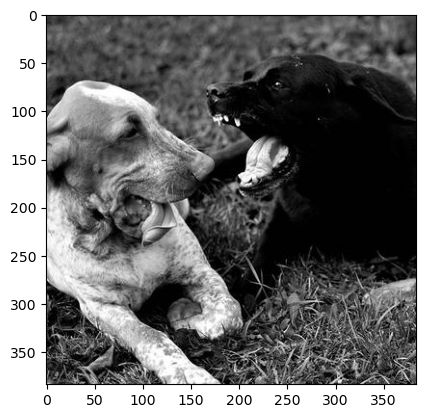

In [6]:
############
# Check it #
############
#print(sorted_files[3950:3999])
plt.imshow(resized_images[3999], cmap=plt.cm.gray)

In [7]:
#############################################
# Build the feature matrix and label vector #
#############################################
X = np.array([img.flatten() for img in resized_images])
y = labels.iloc[:, -1]

#####################
# Check data frames #
#####################
print(f"X Shape:{X.shape}\ny Shape:{y.shape}")

X Shape:(4000, 442368)
y Shape:(4000,)


In [8]:
##########################
# Normalize the features #
##########################
X_normal = scale(X)

In [9]:
# Calculate the mean and standard deviation of the scaled features
mean = X_normal.mean(axis=0)
std_dev = X_normal.std(axis=0)

print("Mean of the scaled features:", mean)
print("Standard deviation of the scaled features:", std_dev)

Mean of the scaled features: [-4.16333634e-18  4.71914174e-17 -6.86672941e-17 ... -5.76622083e-17
  9.90735272e-17  1.31283873e-17]
Standard deviation of the scaled features: [1. 1. 1. ... 1. 1. 1.]


In [10]:
#################################################
# Split the data into training and testing sets #
#################################################
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.25, random_state=1)

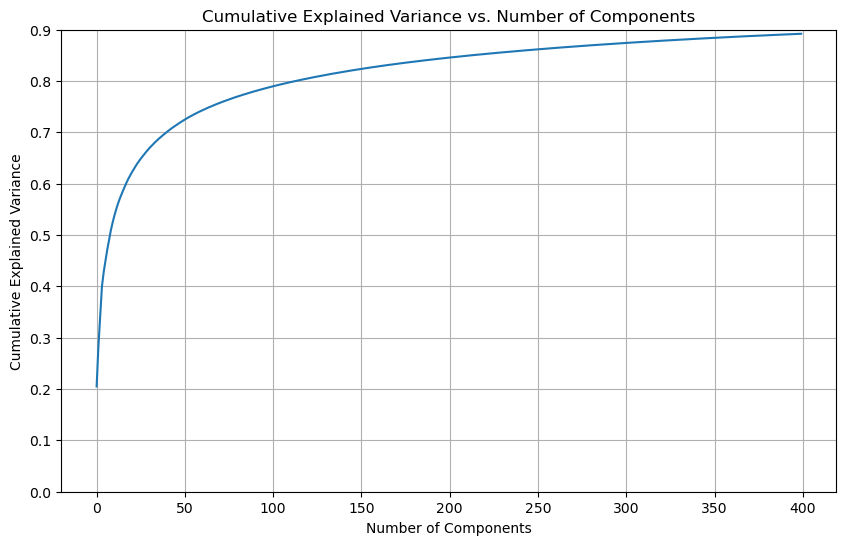

In [11]:
#####################################
# Get cumulative explained variance #
#####################################
n_components = 400
myPCA = PCA(n_components=n_components)
myPCA.fit(X_normal)

explained_variance_ratio = myPCA.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
#plt.xlim(0, 1000)
plt.ylim(0, 0.9)
plt.grid()
plt.show()

In [12]:
####################################
# Run PCA to reduce dimensionality #
####################################
k = 400
myPCA = PCA(n_components=k)
X_train_new = myPCA.fit_transform(X_train)
X_test_new = myPCA.transform(X_test)

In [13]:
##############################
# Check new data frame shape #
##############################
print(f"X_train Shape:{X_train.shape}\nX_test Shape:{X_test.shape}")
print(f"X_train_new Shape:{X_train_new.shape}\nX_test_new Shape:{X_test_new.shape}")

X_train Shape:(3000, 442368)
X_test Shape:(1000, 442368)
X_train_new Shape:(3000, 400)
X_test_new Shape:(1000, 400)


In [14]:
#############################
# Create the SVM Classifier #
#############################
mySVC = SVC(C=50000, kernel='sigmoid', gamma=0.05, random_state=1)
mySVC.fit(X_train_new, y_train)
y_pred = mySVC.predict(X_test_new)    

In [15]:
############################################
# Report the accuracy and confusion matrix #
############################################
accuracy = metrics.accuracy_score(y_test, y_pred)
confusion = metrics.confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.284
Confusion Matrix:
[[130   6 128   6]
 [106  13 124   6]
 [ 99   5 135   7]
 [105  13 111   6]]


In [16]:
#########################
# Create the classifier #
#########################
mySVC = SVC(kernel='sigmoid', random_state=1)

############################
# Setup the parameter grid #
############################
param_grid = {
    'C': [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5],
    'gamma': [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]
}

##################################
# Run PCA on the normalized data #
##################################
X_Normalized_pca = myPCA.fit_transform(X_normal)

###################
# Run Grid Search #
###################
my_grid = GridSearchCV(mySVC, param_grid, scoring='accuracy', cv=10, verbose=3)
my_grid.fit(X_Normalized_pca, y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV 1/10] END ..............C=0.1, gamma=0.0005;, score=0.223 total time=   1.0s
[CV 2/10] END ..............C=0.1, gamma=0.0005;, score=0.228 total time=   0.9s
[CV 3/10] END ..............C=0.1, gamma=0.0005;, score=0.225 total time=   0.9s
[CV 4/10] END ..............C=0.1, gamma=0.0005;, score=0.235 total time=   1.0s
[CV 5/10] END ..............C=0.1, gamma=0.0005;, score=0.240 total time=   1.0s
[CV 6/10] END ..............C=0.1, gamma=0.0005;, score=0.273 total time=   1.0s
[CV 7/10] END ..............C=0.1, gamma=0.0005;, score=0.260 total time=   1.1s
[CV 8/10] END ..............C=0.1, gamma=0.0005;, score=0.247 total time=   1.0s
[CV 9/10] END ..............C=0.1, gamma=0.0005;, score=0.258 total time=   1.0s
[CV 10/10] END .............C=0.1, gamma=0.0005;, score=0.228 total time=   1.0s
[CV 1/10] END ...............C=0.1, gamma=0.001;, score=0.270 total time=   0.9s
[CV 2/10] END ...............C=0.1, gamma=0.00

[CV 2/10] END .................C=1, gamma=0.001;, score=0.237 total time=   0.8s
[CV 3/10] END .................C=1, gamma=0.001;, score=0.237 total time=   0.8s
[CV 4/10] END .................C=1, gamma=0.001;, score=0.228 total time=   0.8s
[CV 5/10] END .................C=1, gamma=0.001;, score=0.240 total time=   0.9s
[CV 6/10] END .................C=1, gamma=0.001;, score=0.268 total time=   0.9s
[CV 7/10] END .................C=1, gamma=0.001;, score=0.263 total time=   0.8s
[CV 8/10] END .................C=1, gamma=0.001;, score=0.223 total time=   0.8s
[CV 9/10] END .................C=1, gamma=0.001;, score=0.235 total time=   0.8s
[CV 10/10] END ................C=1, gamma=0.001;, score=0.235 total time=   0.8s
[CV 1/10] END .................C=1, gamma=0.005;, score=0.263 total time=   0.8s
[CV 2/10] END .................C=1, gamma=0.005;, score=0.233 total time=   0.9s
[CV 3/10] END .................C=1, gamma=0.005;, score=0.263 total time=   0.8s
[CV 4/10] END ..............

[CV 4/10] END ................C=10, gamma=0.005;, score=0.237 total time=   0.7s
[CV 5/10] END ................C=10, gamma=0.005;, score=0.247 total time=   0.8s
[CV 6/10] END ................C=10, gamma=0.005;, score=0.285 total time=   0.8s
[CV 7/10] END ................C=10, gamma=0.005;, score=0.273 total time=   0.8s
[CV 8/10] END ................C=10, gamma=0.005;, score=0.220 total time=   0.8s
[CV 9/10] END ................C=10, gamma=0.005;, score=0.268 total time=   0.8s
[CV 10/10] END ...............C=10, gamma=0.005;, score=0.237 total time=   0.8s
[CV 1/10] END .................C=10, gamma=0.01;, score=0.270 total time=   0.8s
[CV 2/10] END .................C=10, gamma=0.01;, score=0.233 total time=   0.8s
[CV 3/10] END .................C=10, gamma=0.01;, score=0.247 total time=   0.8s
[CV 4/10] END .................C=10, gamma=0.01;, score=0.235 total time=   0.8s
[CV 5/10] END .................C=10, gamma=0.01;, score=0.258 total time=   0.8s
[CV 6/10] END ..............

[CV 6/10] END ................C=100, gamma=0.01;, score=0.270 total time=   0.8s
[CV 7/10] END ................C=100, gamma=0.01;, score=0.265 total time=   0.8s
[CV 8/10] END ................C=100, gamma=0.01;, score=0.225 total time=   0.8s
[CV 9/10] END ................C=100, gamma=0.01;, score=0.240 total time=   0.8s
[CV 10/10] END ...............C=100, gamma=0.01;, score=0.233 total time=   0.8s
[CV 1/10] END ................C=100, gamma=0.05;, score=0.275 total time=   0.8s
[CV 2/10] END ................C=100, gamma=0.05;, score=0.233 total time=   0.8s
[CV 3/10] END ................C=100, gamma=0.05;, score=0.247 total time=   0.8s
[CV 4/10] END ................C=100, gamma=0.05;, score=0.263 total time=   0.8s
[CV 5/10] END ................C=100, gamma=0.05;, score=0.253 total time=   0.8s
[CV 6/10] END ................C=100, gamma=0.05;, score=0.265 total time=   0.7s
[CV 7/10] END ................C=100, gamma=0.05;, score=0.250 total time=   0.8s
[CV 8/10] END ..............

[CV 8/10] END .............C=1000.0, gamma=0.05;, score=0.212 total time=   0.8s
[CV 9/10] END .............C=1000.0, gamma=0.05;, score=0.253 total time=   0.8s
[CV 10/10] END ............C=1000.0, gamma=0.05;, score=0.235 total time=   0.8s
[CV 1/10] END ..............C=1000.0, gamma=0.1;, score=0.275 total time=   0.7s
[CV 2/10] END ..............C=1000.0, gamma=0.1;, score=0.237 total time=   0.7s
[CV 3/10] END ..............C=1000.0, gamma=0.1;, score=0.253 total time=   0.8s
[CV 4/10] END ..............C=1000.0, gamma=0.1;, score=0.270 total time=   0.8s
[CV 5/10] END ..............C=1000.0, gamma=0.1;, score=0.250 total time=   0.8s
[CV 6/10] END ..............C=1000.0, gamma=0.1;, score=0.215 total time=   0.8s
[CV 7/10] END ..............C=1000.0, gamma=0.1;, score=0.247 total time=   0.7s
[CV 8/10] END ..............C=1000.0, gamma=0.1;, score=0.212 total time=   0.8s
[CV 9/10] END ..............C=1000.0, gamma=0.1;, score=0.260 total time=   0.8s
[CV 10/10] END .............

[CV 10/10] END .............C=5000.0, gamma=0.1;, score=0.228 total time=   0.8s
[CV 1/10] END ..............C=5000.0, gamma=0.5;, score=0.278 total time=   0.7s
[CV 2/10] END ..............C=5000.0, gamma=0.5;, score=0.240 total time=   0.7s
[CV 3/10] END ..............C=5000.0, gamma=0.5;, score=0.270 total time=   0.8s
[CV 4/10] END ..............C=5000.0, gamma=0.5;, score=0.273 total time=   0.8s
[CV 5/10] END ..............C=5000.0, gamma=0.5;, score=0.250 total time=   0.8s
[CV 6/10] END ..............C=5000.0, gamma=0.5;, score=0.215 total time=   0.7s
[CV 7/10] END ..............C=5000.0, gamma=0.5;, score=0.260 total time=   0.8s
[CV 8/10] END ..............C=5000.0, gamma=0.5;, score=0.207 total time=   0.8s
[CV 9/10] END ..............C=5000.0, gamma=0.5;, score=0.255 total time=   0.8s
[CV 10/10] END .............C=5000.0, gamma=0.5;, score=0.230 total time=   0.7s
[CV 1/10] END ................C=5000.0, gamma=1;, score=0.275 total time=   0.8s
[CV 2/10] END ..............

[CV 2/10] END ...............C=10000.0, gamma=1;, score=0.230 total time=   0.8s
[CV 3/10] END ...............C=10000.0, gamma=1;, score=0.265 total time=   0.8s
[CV 4/10] END ...............C=10000.0, gamma=1;, score=0.273 total time=   0.7s
[CV 5/10] END ...............C=10000.0, gamma=1;, score=0.250 total time=   0.8s
[CV 6/10] END ...............C=10000.0, gamma=1;, score=0.215 total time=   0.8s
[CV 7/10] END ...............C=10000.0, gamma=1;, score=0.255 total time=   0.8s
[CV 8/10] END ...............C=10000.0, gamma=1;, score=0.207 total time=   0.8s
[CV 9/10] END ...............C=10000.0, gamma=1;, score=0.263 total time=   0.8s
[CV 10/10] END ..............C=10000.0, gamma=1;, score=0.235 total time=   0.8s
[CV 1/10] END ...............C=10000.0, gamma=5;, score=0.273 total time=   0.8s
[CV 2/10] END ...............C=10000.0, gamma=5;, score=0.233 total time=   0.8s
[CV 3/10] END ...............C=10000.0, gamma=5;, score=0.265 total time=   0.7s
[CV 4/10] END ..............

[CV 4/10] END ...............C=50000.0, gamma=5;, score=0.278 total time=   0.8s
[CV 5/10] END ...............C=50000.0, gamma=5;, score=0.245 total time=   0.8s
[CV 6/10] END ...............C=50000.0, gamma=5;, score=0.220 total time=   0.8s
[CV 7/10] END ...............C=50000.0, gamma=5;, score=0.247 total time=   0.8s
[CV 8/10] END ...............C=50000.0, gamma=5;, score=0.207 total time=   0.8s
[CV 9/10] END ...............C=50000.0, gamma=5;, score=0.263 total time=   0.8s
[CV 10/10] END ..............C=50000.0, gamma=5;, score=0.237 total time=   0.8s
[CV 1/10] END .........C=100000.0, gamma=0.0005;, score=0.223 total time=   0.9s
[CV 2/10] END .........C=100000.0, gamma=0.0005;, score=0.230 total time=   0.9s
[CV 3/10] END .........C=100000.0, gamma=0.0005;, score=0.228 total time=   0.9s
[CV 4/10] END .........C=100000.0, gamma=0.0005;, score=0.228 total time=   0.9s
[CV 5/10] END .........C=100000.0, gamma=0.0005;, score=0.237 total time=   0.9s
[CV 6/10] END .........C=100

GridSearchCV(cv=10, estimator=SVC(kernel='sigmoid', random_state=1),
             param_grid={'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0,
                               50000.0, 100000.0],
                         'gamma': [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                   1, 5]},
             scoring='accuracy', verbose=3)

In [17]:
###############################################
# View the best value for C and best accuracy #
###############################################
print("Best value for parameters C, gamma:", my_grid.best_params_)
print("Best accuracy:", my_grid.best_score_)

Best value for parameters C, gamma: {'C': 1, 'gamma': 0.005}
Best accuracy: 0.25175000000000003
